Epoch 1/5
844/844 [==============================] - 45s 53ms/step - loss: 0.1602 - accuracy: 0.9523 - val_loss: 0.0570 - val_accuracy: 0.9832
Epoch 2/5
844/844 [==============================] - 50s 59ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0543 - val_accuracy: 0.9848
Epoch 3/5
844/844 [==============================] - 44s 52ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0529 - val_accuracy: 0.9872
Epoch 4/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0465 - val_accuracy: 0.9882
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0427 - accuracy: 0.9868
Test Loss: 0.04267549887299538
Test Accuracy: 0.9868000149726868
313/313 [==============================] - 3s 7ms/step
Number of incorrect predictions: 132
Probabilities for some incorrect predictions:
0: 0.0000165874%
1: 0.0002343634%
2: 0.0028678258%
3: 26.3648808002%
4: 0.0000000106%
5: 72.7766156197%
6: 0.0000034129%
7: 0.

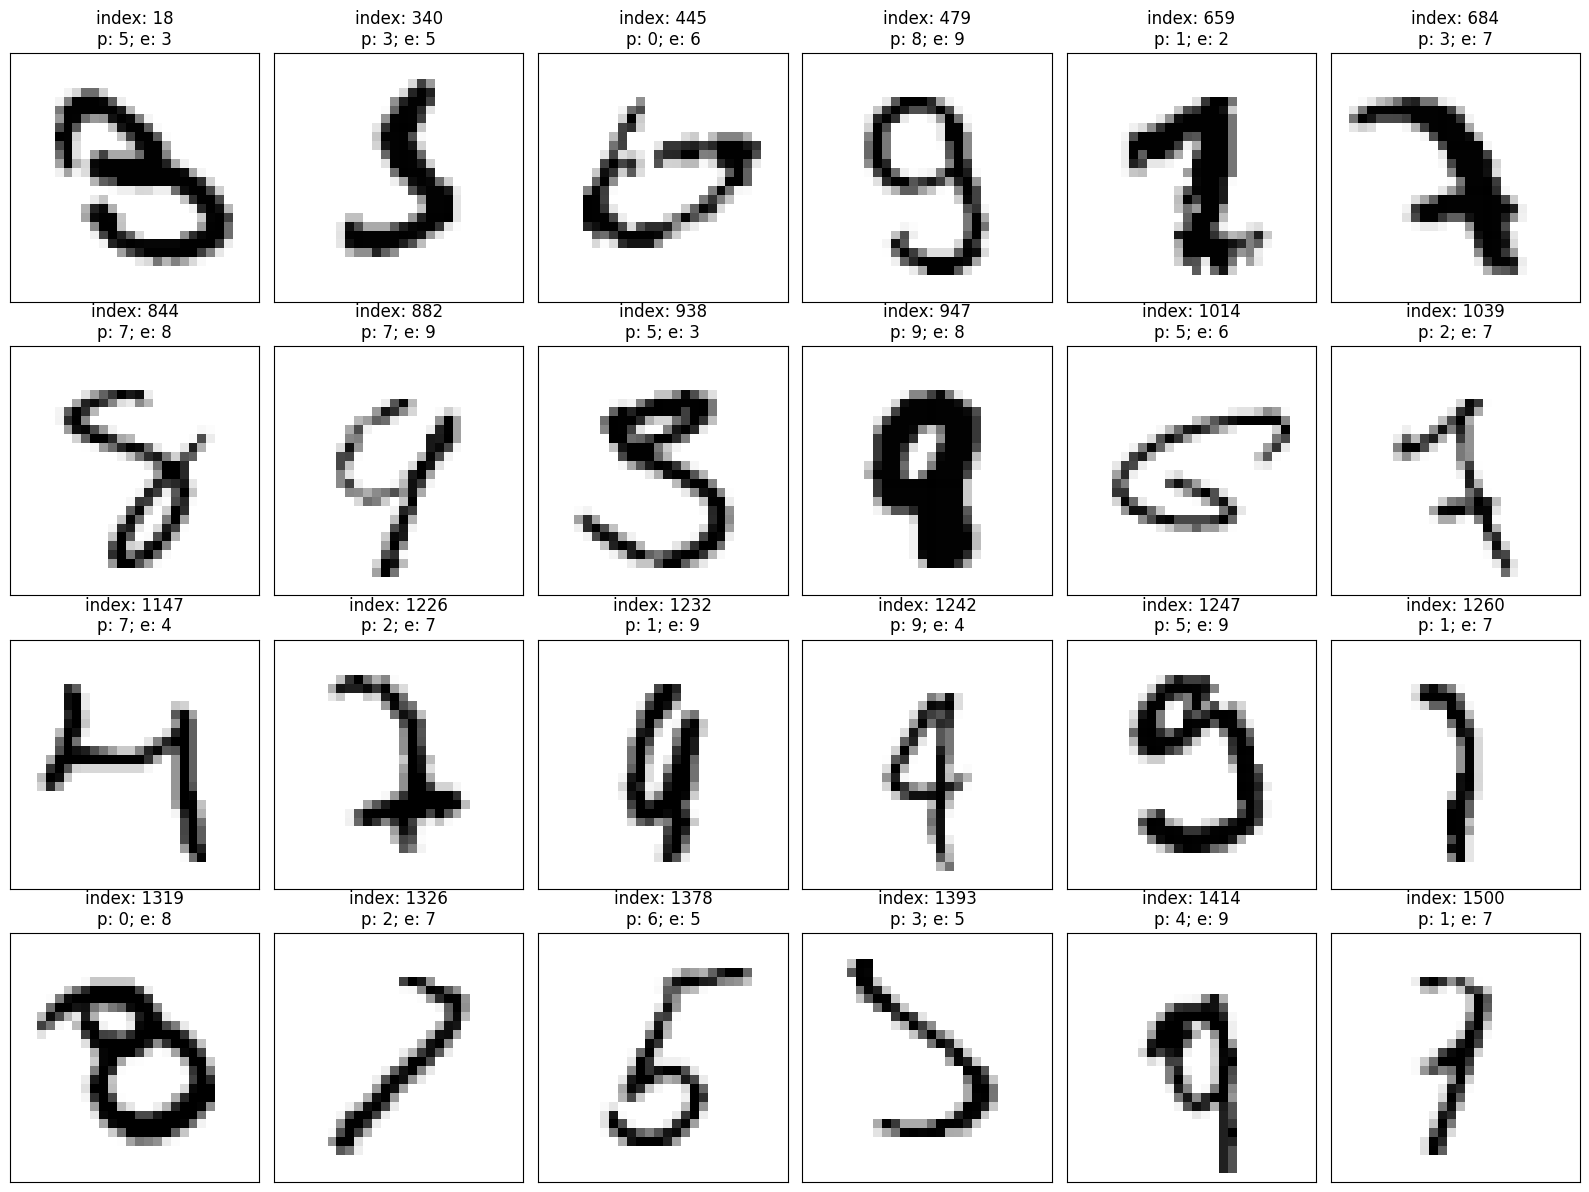

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = cnn.predict(X_test)


images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))


print("Number of incorrect predictions:", len(incorrect_predictions))
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions[:24]):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()


def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

print("Probabilities for some incorrect predictions:")
for i in range(3):
    display_probabilities(predictions[incorrect_predictions[i][0]])
